In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#PCA

In [ ]:
from sklearn.decomposition import PCA

def pca_to_62x62(input_data):

    pca = PCA(n_components=62)
    transformed_data = pca.fit_transform(input_data)
    return transformed_data


#Rescaling


In [ ]:
import numpy as np

def rescale_to_0_255(data):

    # Find the minimum and maximum values in the data
    min_val = data.min()
    max_val = data.max()

    # Perform min-max scaling to rescale the data to [0, 255]
    scaled_data = 255 * (data - min_val) / (max_val - min_val)

    return scaled_data.astype(np.uint8)  # Ensure the data type is uint8 for image representation


In [ ]:
def zscale_row_wise(data):
    scaler = StandardScaler()
    dataz = scaler.fit_transform(data.T).T
    return dataz


In [ ]:
!pip install numpy pandas scipy scikit-learn


# Data transformation for noise reduction and dimensionality reduction along with reshaping

In [ ]:
import os
import numpy as np
from scipy.io import loadmat
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Define the directory path where the .mat files are located
base_dir = '/content/drive/MyDrive/SEED_IV/SEED_IV/eeg_raw_data'

# Set the batch size
batch_size = 4  # Adjust as needed

# Initialize an empty DataFrame
final_df = pd.DataFrame()

# Define the expected dimensions for reshaping
height, width, channels = 62, 62, 1  # Adjust as needed

# Traverse through the directories and load .mat files
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)

    if os.path.isdir(folder_path):
        # Initialize a list to store DataFrames for each batch
        batch_dfs = []

        for file in os.listdir(folder_path):
            if file.endswith('.mat'):
                file_path = os.path.join(folder_path, file)
                data = loadmat(file_path)  # Load .mat file

                # Initialize a DataFrame for each batch
                batch_df = pd.DataFrame()

                # Loop through variables in the loaded .mat file
                for var_key, var_value in data.items():
                    # Skip variables that start with double underscores "__"
                    if var_key.startswith("__"):
                        continue

                    # Define the column name for the DataFrame
                    column_name = f'{folder}_{var_key}'

                    # Create a new column in the DataFrame and assign the variable
                    batch_df[column_name] = [var_value]

                batch_dfs.append(batch_df)

                # Process the batch once it reaches the specified batch size
                if len(batch_dfs) >= batch_size:
                    batch_df = pd.concat(batch_dfs, axis=1)

                    # Apply PCA and rescaling to the batch
                    batch_df = batch_df.applymap(zscale_row_wise)
                    batch_df = batch_df.applymap(pca_to_62x62)
                    batch_df = batch_df.applymap(rescale_to_0_255)

                    # Iterate through columns to reshape the data
                    for col in batch_df.columns:
                        batch_df[col] = batch_df[col].apply(lambda x: x.reshape((height, width, channels)))

                    # Append the batch to the final DataFrame
                    final_df = pd.concat([final_df, batch_df], axis=1)
                    batch_dfs = []

        # Process any remaining data in the last batch
        if len(batch_dfs) > 0:
            batch_df = pd.concat(batch_dfs, axis=1)

            # Apply PCA and rescaling to the last batch
            batch_df = batch_df.applymap(zscale_row_wise)
            batch_df = batch_df.applymap(pca_to_62x62)
            batch_df = batch_df.applymap(rescale_to_0_255)

            # Iterate through columns to reshape the data
            for col in batch_df.columns:
                batch_df[col] = batch_df[col].apply(lambda x: x.reshape((height, width, channels)))

            # Append the last batch to the final DataFrame
            final_df = pd.concat([final_df, batch_df], axis=1)


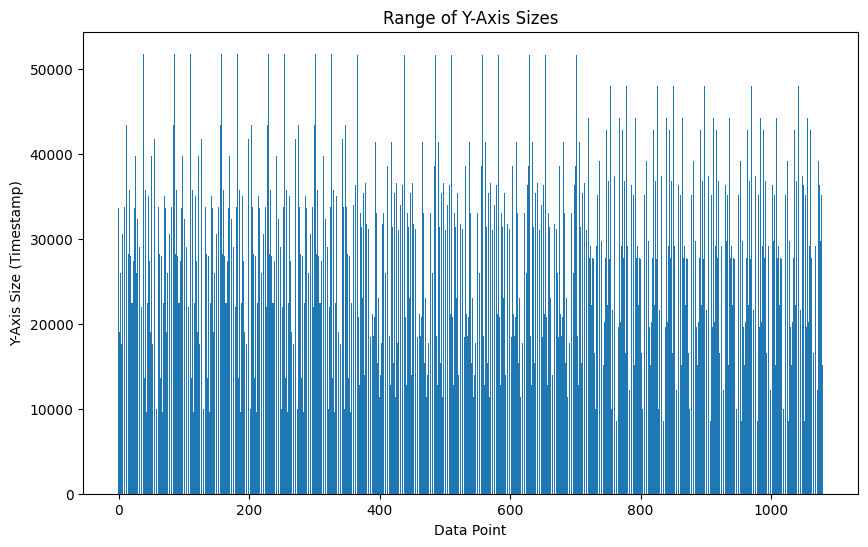

Minimum Y-Axis (Timestamp) Size: 8601
Maximum Y-Axis (Timestamp) Size: 51801


In [ ]:
import os
import numpy as np
from scipy.io import loadmat
import pandas as pd
import matplotlib.pyplot as plt

# Define the directory path where the .mat files are located
base_dir = '/content/drive/MyDrive/SEED_IV/SEED_IV/eeg_raw_data'

# Initialize lists to store the shapes of the original data and the corresponding folder
original_data_shapes = []
y_axis_sizes = []

# Traverse through the directories and load .mat files
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)

    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            if file.endswith('.mat'):
                file_path = os.path.join(folder_path, file)
                data = loadmat(file_path)  # Load .mat file

                # Loop through variables in the loaded .mat file
                for var_key, var_value in data.items():
                    # Skip variables that start with double underscores "__"
                    if var_key.startswith("__"):
                        continue

                    # Get the shape of the original data
                    original_shape = var_value.shape
                    original_data_shapes.append((folder, var_key, original_shape))
                    y_axis_sizes.append(original_shape[1])

# Plot the Y-axis (timestamp) sizes
plt.figure(figsize=(10, 6))
plt.bar(range(len(y_axis_sizes)), y_axis_sizes)
plt.xlabel("Data Point")
plt.ylabel("Y-Axis Size (Timestamp)")
plt.title("Range of Y-Axis Sizes")
plt.show()

min_y_axis_size = min(y_axis_sizes)
max_y_axis_size = max(y_axis_sizes)

print(f"Minimum Y-Axis (Timestamp) Size: {min_y_axis_size}")
print(f"Maximum Y-Axis (Timestamp) Size: {max_y_axis_size}")


In [ ]:
final_df.head()  # Displays the first 5 rows



,1_tyc_eeg1,1_tyc_eeg2,1_tyc_eeg3,1_tyc_eeg4,1_tyc_eeg5,1_tyc_eeg6,1_tyc_eeg7,1_tyc_eeg8,1_tyc_eeg9,1_tyc_eeg10,...,2_rx_eeg15,2_rx_eeg16,2_rx_eeg17,2_rx_eeg18,2_rx_eeg19,2_rx_eeg20,2_rx_eeg21,2_rx_eeg22,2_rx_eeg23,2_rx_eeg24
0,"[[[246], [116], [76], [70], [155], [135], [130...","[[[121], [159], [34], [115], [36], [113], [68]...","[[[153], [71], [66], [42], [96], [56], [102], ...","[[[118], [164], [67], [66], [48], [36], [95], ...","[[[236], [122], [84], [92], [101], [76], [102]...","[[[165], [223], [106], [117], [100], [79], [78...","[[[149], [219], [90], [122], [63], [150], [104...","[[[240], [143], [102], [83], [159], [158], [10...","[[[189], [167], [87], [108], [53], [148], [140...","[[[243], [153], [109], [93], [71], [129], [161...",...,"[[[213], [175], [145], [179], [70], [129], [96...","[[[233], [132], [149], [192], [107], [77], [79...","[[[175], [104], [171], [116], [62], [153], [64...","[[[242], [169], [105], [169], [78], [79], [129...","[[[207], [155], [188], [133], [55], [141], [82...","[[[207], [101], [144], [164], [49], [103], [79...","[[[214], [95], [146], [170], [77], [146], [100...","[[[223], [184], [112], [68], [177], [80], [103...","[[[165], [184], [162], [176], [69], [138], [10...","[[[235], [140], [152], [186], [64], [147], [12..."


In [ ]:
value = final_df.iloc[0, 1079]  # Row index 2 (3rd row) and column index 1 (2nd column)
print("value:", value.size)


value: 3844


#Labelling

In [ ]:
# Sample labels from your provided information
session1_label = [1, 2, 3, 0, 2, 0, 0, 1, 0, 1, 2, 1, 1, 1, 2, 3, 2, 2, 3, 3, 0, 3, 0, 3]
session2_label = [2, 1, 3, 0, 0, 2, 0, 2, 3, 3, 2, 3, 2, 0, 1, 1, 2, 1, 0, 3, 0, 1, 3, 1]
session3_label = [1, 2, 2, 1, 3, 3, 3, 1, 1, 2, 1, 0, 2, 3, 3, 0, 2, 3, 0, 0, 2, 0, 1, 0]

# Sample DataFrame column names
column_names = final_df.columns

# Add a new row for emotion labels
final_df.loc['Emotion_Label'] = [
    session1_label[int(name[-2:]) - 1] if name[0] == '1' and name[-2].isdigit() else
    session1_label[int(name[-1:]) - 1] if name[0] == '1' else
    session2_label[int(name[-2:]) - 1] if name[0] == '2' and name[-2].isdigit() else
    session2_label[int(name[-1:]) - 1] if name[0] == '2' else
    session3_label[int(name[-2:]) - 1] if name[0] == '3' and name[-2].isdigit() else
    session3_label[int(name[-1:]) - 1] if name[0] == '3' else 20
 for name in column_names
]


In [ ]:
# Convert labels to integers
label_mapping = {'Class 0': 0, 'Class 1': 1, 'Class 2': 2, 'Class 3': 3}
final_df = final_df.replace({'Emotion_Label': label_mapping})

In [ ]:
final_df.head()  # Displays the first 5 rows


,1_tyc_eeg1,1_tyc_eeg2,1_tyc_eeg3,1_tyc_eeg4,1_tyc_eeg5,1_tyc_eeg6,1_tyc_eeg7,1_tyc_eeg8,1_tyc_eeg9,1_tyc_eeg10,...,2_rx_eeg15,2_rx_eeg16,2_rx_eeg17,2_rx_eeg18,2_rx_eeg19,2_rx_eeg20,2_rx_eeg21,2_rx_eeg22,2_rx_eeg23,2_rx_eeg24
0,"[[[246], [116], [76], [70], [155], [135], [130...","[[[121], [159], [34], [115], [36], [113], [68]...","[[[153], [71], [66], [42], [96], [56], [102], ...","[[[118], [164], [67], [66], [48], [36], [95], ...","[[[236], [122], [84], [92], [101], [76], [102]...","[[[165], [223], [106], [117], [100], [79], [78...","[[[149], [219], [90], [122], [63], [150], [104...","[[[240], [143], [102], [83], [159], [158], [10...","[[[189], [167], [87], [108], [53], [148], [140...","[[[243], [153], [109], [93], [71], [129], [161...",...,"[[[213], [175], [145], [179], [70], [129], [96...","[[[233], [132], [149], [192], [107], [77], [79...","[[[175], [104], [171], [116], [62], [153], [64...","[[[242], [169], [105], [169], [78], [79], [129...","[[[207], [155], [188], [133], [55], [141], [82...","[[[207], [101], [144], [164], [49], [103], [79...","[[[214], [95], [146], [170], [77], [146], [100...","[[[223], [184], [112], [68], [177], [80], [103...","[[[165], [184], [162], [176], [69], [138], [10...","[[[235], [140], [152], [186], [64], [147], [12..."
Emotion_Label,1,2,3,0,2,0,0,1,0,1,...,1,1,2,1,0,3,0,1,3,1


#Data split

In [ ]:
import numpy as np

# Assuming Image_Matrix and Label are your DataFrames
# Extract the data and labels
# Extract the data and labels
Image_Matrix = final_df.iloc[0, :].to_list()
Label = final_df.iloc[1, :].to_list()

# Define X as the input data (images)
X = np.array(Image_Matrix).reshape(-1, 62, 62, 1)

# Define y as the labels
y = np.array(Label)

# Split the data into training, validation, and test sets
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)



In [ ]:
print("Data types and shapes:")
print("X_train:", type(X_train), X_train.shape if hasattr(X_train, 'shape') else None)
print("X_val:", type(X_val), X_val.shape if hasattr(X_val, 'shape') else None)
print("X_test:", type(X_test), X_test.shape if hasattr(X_test, 'shape') else None)
print("y_train:", type(y_train), y_train.shape if hasattr(y_train, 'shape') else None)
print("y_val:", type(y_val), y_val.shape if hasattr(y_val, 'shape') else None)
print("y_test:", type(y_test), y_test.shape if hasattr(y_test, 'shape') else None)

# Check the data type of the first element in X_train
if len(X_train) > 0:
    print("Data type of the first element in X_train:", type(X_train[0]))
else:
    print("X_train is empty.")

# Check the data type of the first element in y_train
if len(y_train) > 0:
    print("Data type of the first element in y_train:", type(y_train[0]))
else:
    print("y_train is empty.")


Data types and shapes:
X_train: <class 'numpy.ndarray'> (864, 62, 62, 1)
X_val: <class 'numpy.ndarray'> (151, 62, 62, 1)
X_test: <class 'numpy.ndarray'> (65, 62, 62, 1)
y_train: <class 'numpy.ndarray'> (864,)
y_val: <class 'numpy.ndarray'> (151,)
y_test: <class 'numpy.ndarray'> (65,)
Data type of the first element in X_train: <class 'numpy.ndarray'>
Data type of the first element in y_train: <class 'numpy.int64'>


In [ ]:
print(X_train.dtype)

uint8


In [ ]:
print(y_train.dtype)

int64


In [ ]:
# X_train = X_train.numpy()
# y_train = y_train.numpy()
# X_val = X_val.numpy()
# y_val = y_val.numpy()
# X_test = X_test.numpy()
# y_test = y_test.numpy()


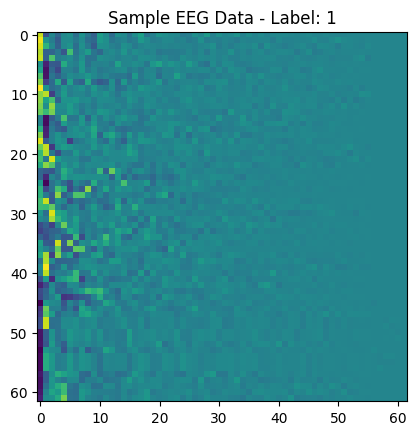

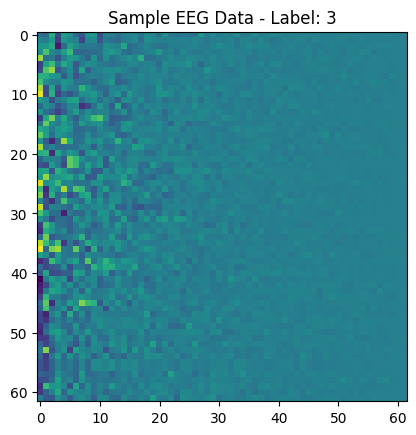

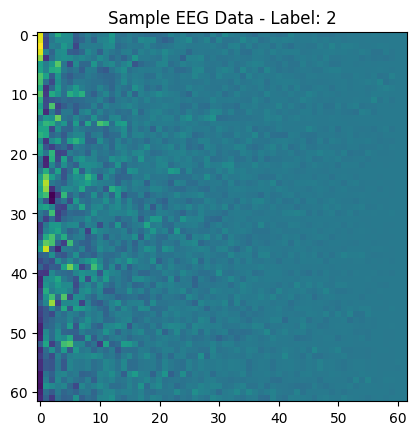

In [ ]:
import matplotlib.pyplot as plt

# Visualize some EEG data samples
sample_indices = [0, 1, 2]
for index in sample_indices:
    sample_image = X_train[index].reshape(62, 62)  # Reshape to (62, 62)
    label = y_train[index]

    plt.figure()
    plt.imshow(sample_image, cmap='viridis')
    plt.title(f"Sample EEG Data - Label: {label}")
    plt.show()


# CNN model


In [ ]:
# import tensorflow as tf
# from tensorflow import keras

# # Define the CNN model
# model = keras.Sequential([
#     keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(62, 62, 1)),
#     keras.layers.MaxPooling2D((2, 2)),
#     keras.layers.Dropout(0.25),
#     keras.layers.Conv2D(256, (3, 3), activation='relu'),
#     keras.layers.MaxPooling2D((2, 2)),
#     keras.layers.Dropout(0.25),
#     keras.layers.Flatten(),
#     keras.layers.Dense(256, activation='relu'),
#     keras.layers.Dropout(0.5),
#     keras.layers.Dense(4, activation='softmax')
# ])

# # Compile the model
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# # Train the model with the original data
# model.fit(X_train, y_train, epochs=8, validation_data=(X_val, y_val))

# # Evaluate the model on the test set
# test_loss, test_acc = model.evaluate(X_test, y_test)
# print("Test accuracy:", test_acc)


Epoch 1/8
27/27 [==============================] - 1s 13ms/step - loss: 298.3979 - accuracy: 0.2627 - val_loss: 122.7406 - val_accuracy: 0.2384
Epoch 2/8
27/27 [==============================] - 0s 5ms/step - loss: 81.3570 - accuracy: 0.2315 - val_loss: 73.5078 - val_accuracy: 0.2781
Epoch 3/8
27/27 [==============================] - 0s 5ms/step - loss: 107.6276 - accuracy: 0.2477 - val_loss: 60.8944 - val_accuracy: 0.2517
Epoch 4/8
27/27 [==============================] - 0s 5ms/step - loss: 58.9145 - accuracy: 0.2662 - val_loss: 35.8691 - val_accuracy: 0.2583
Epoch 5/8
27/27 [==============================] - 0s 5ms/step - loss: 62.6144 - accuracy: 0.2731 - val_loss: 46.9147 - val_accuracy: 0.2318
Epoch 6/8
27/27 [==============================] - 0s 4ms/step - loss: 53.9384 - accuracy: 0.2616 - val_loss: 28.7528 - val_accuracy: 0.2119
Epoch 7/8
27/27 [==============================] - 0s 5ms/step - loss: 36.1482 - accuracy: 0.2743 - val_loss: 56.6573 - val_accuracy: 0.2848
Epoch 8/8

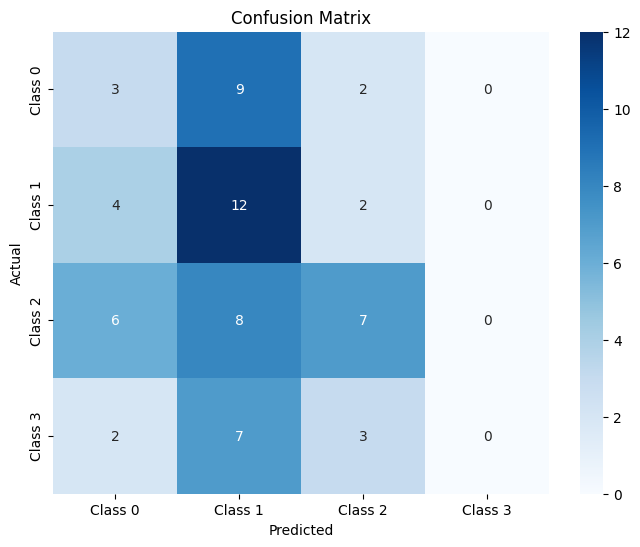

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(62, 62, 1)),
    keras.layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model with the original data
model.fit(X_train, y_train, epochs=8, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)
model.summary()
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Assuming y_train and X_train are available
y_train_probs = model.predict(X_train)
y_train_pred = np.argmax(y_train_probs, axis=1)


27/27 [==============================] - 0s 2ms/step


In [ ]:
print("Actual Labels:", y_train[:10])
print("Predicted Labels:", y_train_pred[:10])


Actual Labels: [1 3 2 0 0 0 0 1 0 2]
Predicted Labels: [1 0 2 2 0 2 2 1 2 2]


In [ ]:
train_loss, train_acc = model.evaluate(X_train, y_train)
print(f"Training accuracy: {train_acc}")


27/27 [==============================] - 0s 3ms/step - loss: 62.6087 - accuracy: 0.3206
Training accuracy: 0.32060185074806213


In [ ]:
model.summary()


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (None, 3844)              0         
                                                                 
 dense_32 (Dense)            (None, 4)                 15380     
                                                                 
Total params: 15380 (60.08 KB)
Trainable params: 15380 (60.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


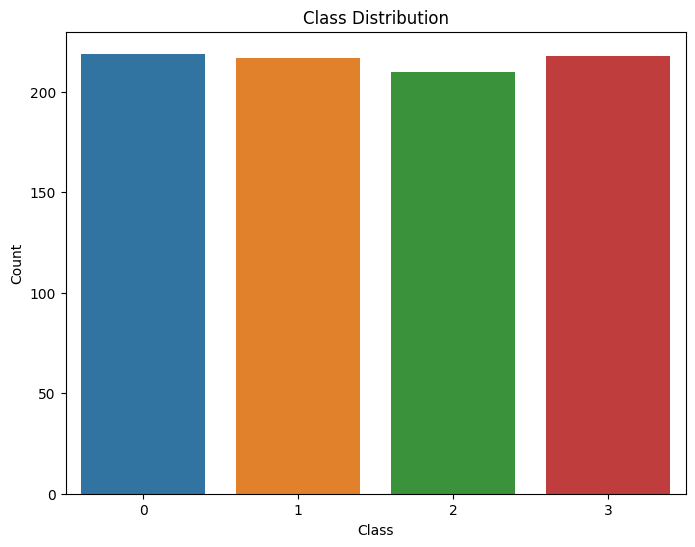

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_train contains your class labels
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

